<h1><center> OkCupid Data Analysis</center></h1>

OkCupid is a popular dating app that uses multiple choice questions to match its users. This app offers a plethora of data that can be used to better understand dating app users and to uncover patterns in their behaviour.

## Scoping

It is always a good idea to pre-define the project's structure. The goals are stated below. Furthermore,the needed data and the planned analysis, evaluation and final output are briefly discussed.

### Goals

The main goal of this project is to demonstrate an understanding of machine learning  techniques, particularly supervised learning. This will be achieved by applying such methods on the data. Among other questions, OkCupid also asks its users to state their religion. Many however do not. The data and various machine learning techniques will be used to predict the religion of users who hve not inputed it.

### Data


The csv file used for this project were provided by codecademy.com. In the data frame each row represents a user and the various columns represent the users' answers to different questions. An overview of the data is given below:

In [1]:
import pandas as pd

data=pd.read_csv('profiles.csv')
print(data.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

### Analysis

The available data are obviously a lot. In order to predict the religion of a user, I will use the following supervised learning techniques:
-  K-Nearest Neighbor
-  Logistic Regression
-  Decision Trees
-  Random Forests

### Evaluation

It will be interesting to see the efficiency of the above mentioned techniques and to decide which one of them is the best. So, I will try to achieve maximum efficiency in each model and then compare them with one another. Metrics like accuracy, precision and F1-score will be used.


- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict.

(Source: codecademy.com)

## Import Python Modules

These are some of the libraries that will be used thoughout the project. Note that the panadas module was imported at an earlier step. The more specialized libraries will be imported later.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data Inspection

An overview of the data is done above. But taking a closer look is necessary. 

The dataframe consists of 59,946 rows and 31 columns. The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

(Source: codecademy.com)

## Data Exploration

There seem to be 45 unique religion categories. But by taking a closer look, it seems that different categories refer to the same religion.

In [3]:
print('Unique religion categories:',data.religion.nunique())
list(data.religion.unique())

Unique religion categories: 45


['agnosticism and very serious about it',
 'agnosticism but not too serious about it',
 nan,
 'atheism',
 'christianity',
 'christianity but not too serious about it',
 'atheism and laughing about it',
 'christianity and very serious about it',
 'other',
 'catholicism',
 'catholicism but not too serious about it',
 'catholicism and somewhat serious about it',
 'agnosticism and somewhat serious about it',
 'catholicism and laughing about it',
 'agnosticism and laughing about it',
 'agnosticism',
 'atheism and somewhat serious about it',
 'buddhism but not too serious about it',
 'other but not too serious about it',
 'buddhism',
 'other and laughing about it',
 'judaism but not too serious about it',
 'buddhism and laughing about it',
 'other and somewhat serious about it',
 'other and very serious about it',
 'hinduism but not too serious about it',
 'atheism but not too serious about it',
 'judaism',
 'christianity and somewhat serious about it',
 'hinduism and very serious about it',

Since the goal is to predict the religion of the user and not how faithful they are, the labels need to be reformed to only contain useful information. This can be done by keeping only the first word of each label and deleting the rest.

In [4]:
data['religion_clean']=data.religion.str.split(' ').str[0]
print('Number of unique religion categories:', data.religion_clean.nunique())
print(data.religion_clean.value_counts())

Number of unique religion categories: 9
agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religion_clean, dtype: int64


Let's represent these data visually:

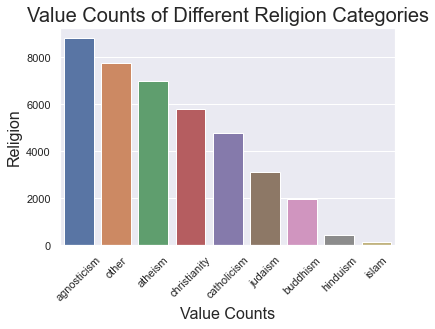

In [5]:
religion_value_counts=data.religion_clean.value_counts()
religion_value_counts=religion_value_counts.to_frame().reset_index()
religion_value_counts=religion_value_counts.rename(columns={'index':'religion','religion_clean':'value_counts'})

sns.set(style="darkgrid")
sns.color_palette("Set3", 10)

sns.barplot(
    x="religion", 
    y="value_counts", 
    data=religion_value_counts)
plt.title('Value Counts of Different Religion Categories', fontsize=20)
plt.ylabel('Religion', fontsize=16)
plt.xlabel('Value Counts', fontsize=16)
plt.xticks(rotation=45)
plt.show()

Furthermore, the rest of the data could be split into discrete and continuous variables. There also the data related to the essays the users write about themselves, but these will be igonred for now.

## Discrete Variables

The discrete variables I will use to predict religion are:
-  drinks
-  education
- job
- sex
- smokes
- orientation

#### Drinks

The alcohol consumption data of the app users are summarized below. Most of them claim to only drink in social occasions.

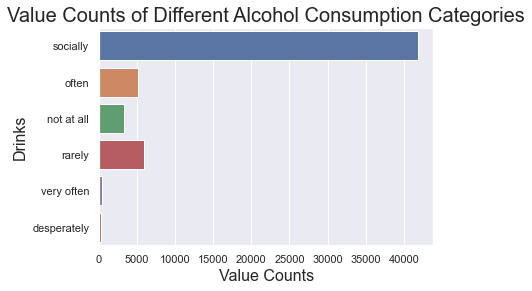

In [9]:
sns.countplot( 
    y="drinks",
    data=data)
plt.title('Value Counts of Different Alcohol Consumption Categories', fontsize=20)
plt.ylabel('Drinks', fontsize=16)
plt.xlabel('Value Counts', fontsize=16)
plt.show()

#### Education

According to the graph below, most users are university/college graduates, followed by masters graduates and college/university students.

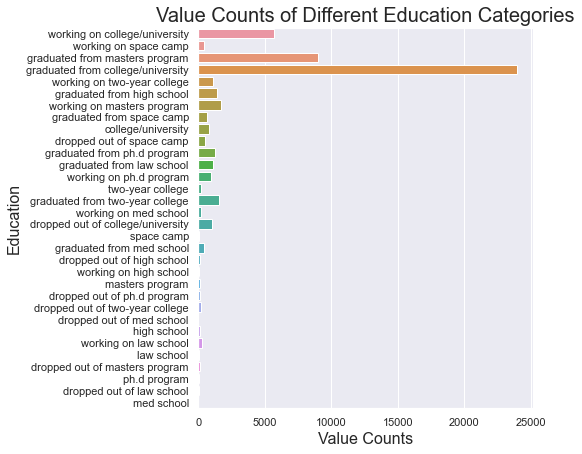

In [11]:
plt.figure(figsize=(6,7))

sns.countplot( 
    y="education",
    data=data)
plt.title('Value Counts of Different Education Categories', fontsize=20)
plt.ylabel('Education', fontsize=16)
plt.xlabel('Value Counts', fontsize=16)
plt.show()

#### Job

Most app users have an unspecified job, followed by students and "science/tech/engineer" workers.

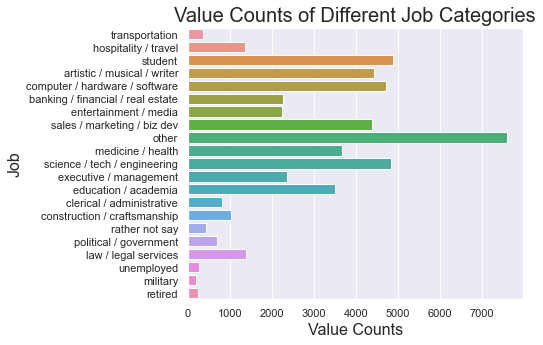

In [12]:
plt.figure(figsize=(6,5))

sns.countplot( 
    y="job",
    data=data)
plt.title('Value Counts of Different Job Categories', fontsize=20)
plt.ylabel('Job', fontsize=16)
plt.xlabel('Value Counts', fontsize=16)
plt.show()

#### Sex

Most app users are male.

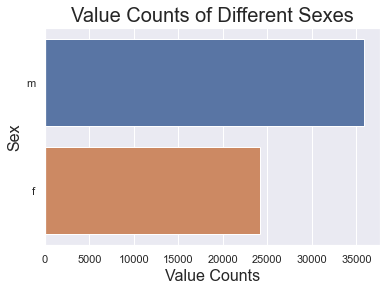

In [14]:
sns.countplot( 
    y="sex",
    data=data)
plt.title('Value Counts of Different Sexes', fontsize=20)
plt.ylabel('Sex', fontsize=16)
plt.xlabel('Value Counts', fontsize=16)
plt.show()

#### Smokes

Most app users are not smokers.

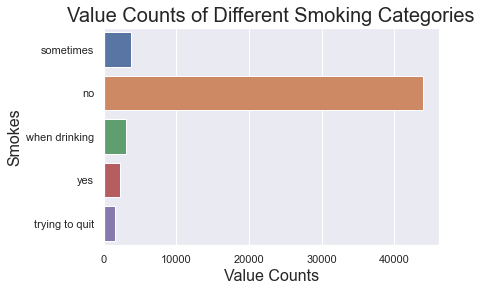

In [15]:
sns.countplot( 
    y="smokes",
    data=data)
plt.title('Value Counts of Different Smoking Categories', fontsize=20)
plt.ylabel('Smokes', fontsize=16)
plt.xlabel('Value Counts', fontsize=16)
plt.show()

#### Orientation

Most app users are straight.

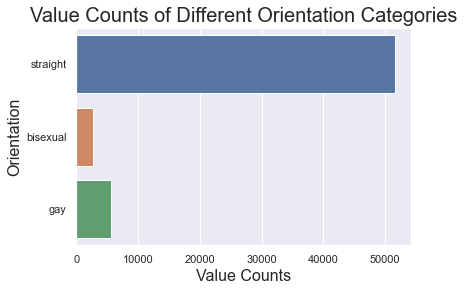

In [46]:
sns.countplot( 
    y="orientation",
    data=data)
plt.title('Value Counts of Different Orientation Categories', fontsize=20)
plt.ylabel('Orientation', fontsize=16)
plt.xlabel('Value Counts', fontsize=16)
plt.show()

## Continuous variables

The continuous variables that will be used are:
- age
- income

#### Age

Most app users are in their late _20s_ or early _30s_.

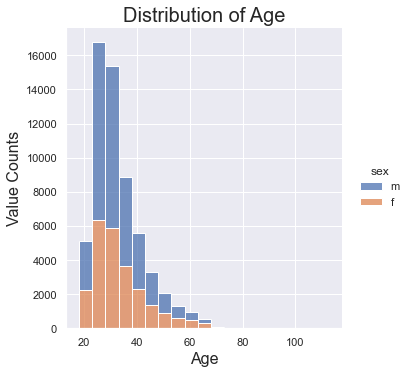

In [16]:
sns.displot( 
    x="age",
    hue='sex',
    kind='hist',
    binwidth=5,
    multiple='stack',
    data=data)
plt.title('Distribution of Age', fontsize=20)
plt.ylabel('Value Counts', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.show()

#### Income

Below is the distribution of income for males and females. It seems that most app users do not input that information. This could disturb the machine learning process, so this variable will not be included after all.

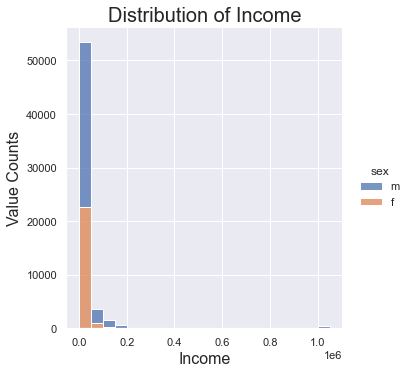

In [17]:
sns.displot( 
    x="income",
    hue='sex',
    kind='hist',
    binwidth=50000,
    multiple='stack',
    data=data)
plt.title('Distribution of Income', fontsize=20)
plt.ylabel('Value Counts', fontsize=16)
plt.xlabel('Income', fontsize=16)
plt.show()

## Preprocess Data

#### Missing values

Many algorithms do not handle missing values well. That is why it is important to be aware of any NaNs in the data and drop them. Specifically, I am going to create a new data frame that does not have any missing values and only consists of the columns I intend to use to predict religion.

In [18]:
data.isnull().sum()

age                   0
body_type          5296
diet              24395
drinks             2985
drugs             14080
education          6628
essay0             5488
essay1             7572
essay2             9638
essay3            11476
essay4            10537
essay5            10850
essay6            13771
essay7            12451
essay8            19225
essay9            12603
ethnicity          5680
height                3
income                0
job                8198
last_online           0
location              0
offspring         35561
orientation           0
pets              19921
religion          20226
sex                   0
sign              11056
smokes             5512
speaks               50
status                0
religion_clean    20226
dtype: int64

In [19]:
#dropping NaNs
cols=['religion_clean','age','drinks','education','job','sex','smokes','income','orientation']
df=data[cols].dropna()
df.shape

(32506, 9)

#### Categorical Variables

In this step, dummy varibles are created to deal with categorical variables. All of the subcategories inside the categorical variables will now represent a new variable which only takes binary values. The reformed dataset now has 117 columns.

In [20]:
categorical=['drinks','education','job','sex','smokes','income','orientation']
for col in categorical:
    df=pd.get_dummies(df, columns=[col], prefix=[col])

In [21]:
df.head()

,religion_clean,age,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,education_college/university,education_dropped out of college/university,...,income_70000,income_80000,income_100000,income_150000,income_250000,income_500000,income_1000000,orientation_bisexual,orientation_gay,orientation_straight
0,agnosticism,22,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,agnosticism,35,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,atheism,29,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,christianity,31,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,atheism,37,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Data Imbalance

It needs to be checked that there is no imbalance in the data. It would be problematic if some of the religion labels appeared very few times:

In [22]:
df.religion_clean.value_counts()

agnosticism     7222
other           6328
atheism         5663
christianity    4764
catholicism     3883
judaism         2545
buddhism        1618
hinduism         383
islam            100
Name: religion_clean, dtype: int64

The first 5 religion categories appear fairly often. But Judaism, Buddhism, Hinduism and Islam appear too few times in comparisson. Of course, this could simply mean that people believing in those religions do not use the specfic dating app. In any case, the data are imbalanced. This is a usual phenomenon. Another reason this is problematic, is that when splitting the data, the training data may lack the underrepresented users. In order to solve this isssue, I will use the SMOTE technique. The information and the methodology regarding SMOTE was acquired from here:
https://machinelearningmastery.com/multi-class-imbalanced-classification/

#### Splitting the data and oversampling

Next, the data needs to be split into training and testing sets. 20% of the data will be preserved for testing and the remaining 80% will be used for training each algorithm

In [37]:
#seperate the labels from the rest of the data
y=df.religion_clean #labels
x=df.iloc[:,1:len(df.columns)]#rest of the data
class_names=y.unique()
# label encode the target variable
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
#split the data
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

Class=4, n=5421 (11.111%)
Class=0, n=5421 (11.111%)
Class=1, n=5421 (11.111%)
Class=3, n=5421 (11.111%)
Class=7, n=5421 (11.111%)
Class=8, n=5421 (11.111%)
Class=2, n=5421 (11.111%)
Class=5, n=5421 (11.111%)
Class=6, n=5421 (11.111%)


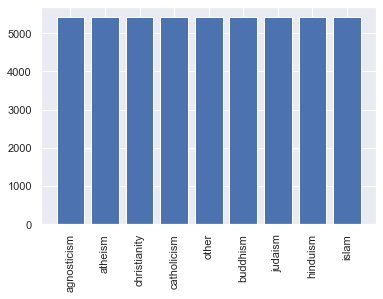

In [38]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
# summarize distribution
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
ax=plt.subplot()
plt.bar(counter.keys(), counter.values())
ax.xaxis.set_ticks(range(9))
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_ticklabels(class_names)
plt.show()

## Analysis

In [25]:
#importing necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

### K-Nearest Neighbor

The K-Nearest Neighbor classifier requires an argument k to specify the number of neighbors that will be used to classify a point. The graph below visualizes the accuracy of the model for different k values. The model is most accurate when k=1.

accuracies=[]
for k in range(1,50):
  classifier=KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train, y_train)
  accuracies.append(classifier.score(x_test, y_test))

k_list=range(1,50)
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.show()

In [39]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

Below are the various metrics used for evaluation. The accuracy is very low at 19%, especially considering that by guessing there is an 11% probability of being correct (1/9).

In [40]:
from sklearn import metrics
knn_predictions = knn_model.predict(x_test)
print(metrics.classification_report(y_test, knn_predictions, target_names=class_names))

              precision    recall  f1-score   support

 agnosticism       0.23      0.21      0.22      1801
     atheism       0.22      0.21      0.22      1457
christianity       0.06      0.09      0.07       395
 catholicism       0.14      0.15      0.14       914
       other       0.17      0.18      0.17      1205
    buddhism       0.03      0.03      0.03       107
     judaism       0.00      0.00      0.00        25
    hinduism       0.10      0.11      0.11       643
       islam       0.25      0.22      0.24      1580

    accuracy                           0.19      8127
   macro avg       0.13      0.13      0.13      8127
weighted avg       0.19      0.19      0.19      8127



### Logistic Regression

In order to use logistic regression, the data needs to be standardized:

In [41]:
from sklearn.preprocessing import StandardScaler

standardizer=StandardScaler()
train_features=standardizer.fit_transform(x_train)
test_features=standardizer.transform(x_test)

In [42]:
lr_model=LogisticRegression(max_iter=500)
lr_model.fit(train_features,y_train)

LogisticRegression(max_iter=500)

In [44]:
lr_predictions = lr_model.predict(test_features)
print(metrics.classification_report(y_test, lr_predictions, target_names=class_names))

              precision    recall  f1-score   support

 agnosticism       0.26      0.31      0.28      1801
     atheism       0.33      0.32      0.33      1457
christianity       0.00      0.00      0.00       395
 catholicism       0.22      0.19      0.20       914
       other       0.28      0.25      0.27      1205
    buddhism       0.05      0.10      0.07       107
     judaism       0.00      0.00      0.00        25
    hinduism       0.18      0.13      0.15       643
       islam       0.34      0.42      0.38      1580

    accuracy                           0.28      8127
   macro avg       0.18      0.19      0.19      8127
weighted avg       0.26      0.28      0.27      8127



C:\Users\giota\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giota\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giota\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy is a bit higher in this model, but again pretty low at 27%.

### Decision Trees

The Decision Tree classifier takes an argument i for max_depth. In the graph below depicts the accuracy achieved with various values for i:

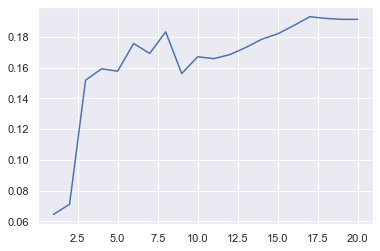

In [32]:
scores=[]

for i in range(1,21):
  tree=DecisionTreeClassifier(random_state=1, max_depth=i)
  tree.fit(x_train, y_train)
  scores.append(tree.score(x_test, y_test))

plt.plot(range(1,21), scores)
plt.show()

It seems that maximum accuracy is achieved when i=10.

In [33]:
dt_model=DecisionTreeClassifier(random_state=1, max_depth=10)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [34]:
dt_predictions=dt_model.predict(x_test)
print(metrics.classification_report(y_test, dt_predictions, target_names=class_names))

              precision    recall  f1-score   support

 agnosticism       0.25      0.07      0.11      1447
     atheism       0.30      0.23      0.26      1180
christianity       0.08      0.14      0.10       314
 catholicism       0.17      0.14      0.15       727
       other       0.19      0.16      0.17       954
    buddhism       0.02      0.33      0.03        78
     judaism       0.01      0.18      0.02        17
    hinduism       0.13      0.15      0.13       523
       islam       0.32      0.25      0.28      1262

    accuracy                           0.17      6502
   macro avg       0.16      0.18      0.14      6502
weighted avg       0.23      0.17      0.19      6502



Accuracy is still pretty low at 20%.

### Random Forest

In [35]:
rf_model=RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [36]:
rf_predictions=rf_model.predict(x_test)
print(metrics.classification_report(y_test, rf_predictions, target_names=class_names))

              precision    recall  f1-score   support

 agnosticism       0.24      0.20      0.21      1447
     atheism       0.25      0.25      0.25      1180
christianity       0.06      0.08      0.07       314
 catholicism       0.13      0.14      0.13       727
       other       0.19      0.19      0.19       954
    buddhism       0.06      0.10      0.08        78
     judaism       0.00      0.00      0.00        17
    hinduism       0.13      0.15      0.14       523
       islam       0.27      0.26      0.27      1262

    accuracy                           0.20      6502
   macro avg       0.15      0.15      0.15      6502
weighted avg       0.21      0.20      0.20      6502



Accuracy is still pretty low at 20%.

## Evaluation

The model that achieved the highest accuracy is logistic regression. A confusion matrix can also be used to visualize the frequency of true positives. On the table below, the diagonal represents true positives.

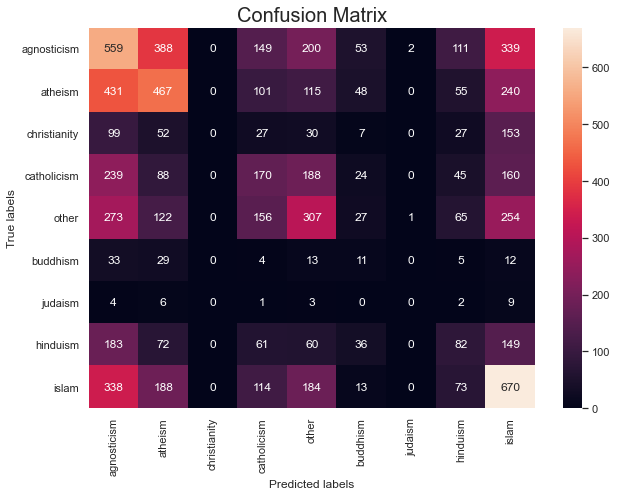

In [45]:
from sklearn.metrics import confusion_matrix 
lr_cm = confusion_matrix(y_test, lr_predictions)
lr_labels = lr_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(lr_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix', fontsize=20);
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(class_names); 
ax.yaxis.set_ticklabels(class_names);

Only Islam and Agnosticism seem to be predicted correctly often enough. Christianity and Hinduism are hardly ever predicted. So this a pretty bad model.

## Conclusion

In this project machine learning was used to predict the religion of OkCupid users. Many app users did not input their religion and it would be interesting to have an algorithm to predict it. However the various models I used did not do significanlty well.

I suspect that the main reason the results are not satisfying is the great imbalance of the data. The religious groups would need to be more equally represented for the algorithms to work. If the app developers were really interested in developing an accurate algorithm to predict religion, they would need to take steps to have more people representing the underepresented religions, maybe by introducing the app to areas known to have a lot of believers.